In [1]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Setting random seed.
seed = 10

In [3]:
df= pd.read_csv(r'hayes-roth.data', delimiter=',', header= 0, names= ['name', 'hobby', 'age','educational level', 'marital status','class'])
df.head()

,name,hobby,age,educational level,marital status,class
0,10,2,1,3,2,2
1,83,3,1,4,1,3
2,61,2,4,2,2,3
3,107,1,1,3,4,3
4,113,1,1,3,2,2


In [4]:
le = LabelEncoder()
le.fit(df['class'].values)
# Converting dataset str labels to int labels.
y = le.transform(df['class'].values)
# Extracting the instances data.
X = df.drop('class', axis=1).values
# Splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=seed)

In [5]:
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.7333333333333333


Confusion Matrix is
[[14  3  0]
 [ 4 14  0]
 [ 1  4  5]]


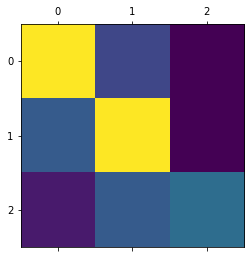

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=df['marital status'].unique()))

              precision    recall  f1-score   support

           2       1.00      0.50      0.67        10
           1       0.67      0.78      0.72        18
           4       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.73      0.68      0.70        28
   macro avg       0.42      0.32      0.35        28
weighted avg       0.79      0.68      0.70        28

